<center>
    <img style="float: left;" src="Mix_colour.png" width="200"></img>
</center>

<br/><br/>
<br/><br/>

# Unsupervised Learning

In the reading material you have read about unsupervised learning from the context of clustering. In the following assignment you will have a chance to take a closer look at the implementation and use of KMeans algorithm.

We start from importing some useful packages.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

For this assignment you will create a data set using `make_blobs` from the scikit-learn library, which is a nice tool to make an artificial data set when playing around with clustering methods. Run the cell below to get your dataset generated!

In [2]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.8,random_state=33) 

X contains the data which has 2 features and y contains the integer labels for cluster membership of each sample.
It is important to remember that in real problems you may encounter you are almost never provided with the number of clusters (neither labels, this is why we are talking about unsupervised learning).

Let's visualize the dataset. First we do a scatter plot of the data points without information in y (let's pretend we don't know how many clusters to expect).

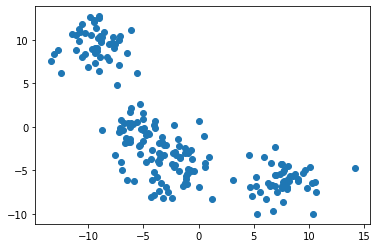

In [3]:
plt.scatter(X[:,0],X[:,1])

Now, since in our case we know the "true" labels, we can use this to colour the different clusters.

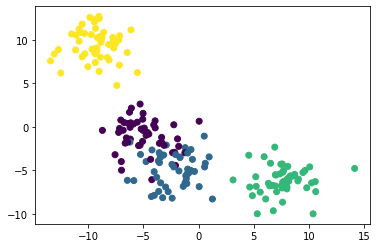

In [4]:
plt.scatter(X[:,0],X[:,1],c=y)

When we generated the data using `make_blobs` we specified the number of cluster by choosing `centers=4`, however as you might notice on the first picture it is not that easy to see that there are exactly 4 clusters.

Now let's see what KMeans algorithm can do.

### Q1:

Create a KMeans model with 4 clusters and fit it to the data `X` and use `random_state=10`.

**Hint:**
* import the necessary module
* create a KMeans instance `kmeans = ` with `random_state=10`
* fit KMeans

In [6]:
# (approx. 3 lines of code)
### START ANSWER HERE ###
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=10)
kmeans.fit(X)
### END ANSWER HERE ###

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [7]:
print('Clusters centers: \n', kmeans.cluster_centers_)

Clusters centers: 
 [[ 7.60630142 -6.18177058]
 [-9.29878487  9.43159491]
 [-5.29697792 -0.72287649]
 [-2.13157052 -4.90289002]]


**Expected Output**: 
<table style="width:100%">
    <tr> 
        <td> Clusters centers</td> 
        <td> [[ 7.60630142 -6.18177058]
 [-9.29878487  9.43159491]
 [-5.29697792 -0.72287649]
 [-2.13157052 -4.90289002]]</td> 
    </tr>
</table> 

In [8]:
# nbgrader cell

Let's plot the dataset and color the points with the labels, predicted by KMeans.

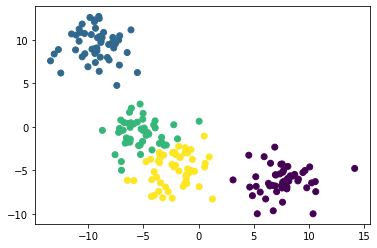

In [9]:
plt.scatter(X[:,0],X[:,1], c=kmeans.predict(X))

## Evaluation

Thus, since we have the true labels of the points, we can check how well KMeans did in clustering them. 

Note that we do not care about the exact label of a point and so we will use the metric `adjusted_rand_score`. Since this might be the first time you encounter this, the following code will be filled in. If you want to learn more on this metric, please check out documentation for `adjusted_rand_score` [here](https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation) and [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html#sklearn.metrics.adjusted_rand_score). 
Also you can read about it on [wikipedia](https://en.wikipedia.org/wiki/Rand_index). 

For now it is enough to know that the score equals 1 is perfect, and that it takes values between -1 and 1.

In [10]:
from sklearn.metrics.cluster import adjusted_rand_score
print('adjusted_rand_score = ', adjusted_rand_score(y, kmeans.labels_))  

adjusted_rand_score =  0.8675506098609771


**Expected Output**: 
<table style="width:100%">
    <tr> 
        <td> adjusted_rand_score</td> 
        <td> 0.8675506098609771</td> 
    </tr>
</table> 

It seems KMeans does pretty well! However usually one does not have an information how many clusters should be in the data. Thus just by visual investigation in our case it would not be surprising to think that the data can be clustered into 3 clusters. 

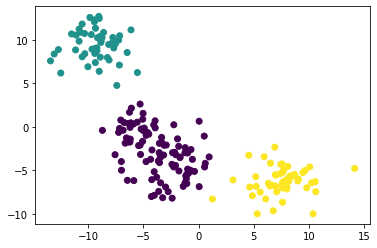

In [11]:
kmeans_3clusters = KMeans(n_clusters=3, random_state=10)
kmeans_3clusters.fit(X)
plt.scatter(X[:,0],X[:,1], c=kmeans_3clusters.predict(X))

Let's see how that will score.

### Q2: 

Calculate the adjusted rand score for the predicted labels of `kmeans_3clusters`.

Use `score = adjusted_rand_score()` with correct input.

In [15]:
# (1 line of code)
### START ANSWER HERE ###
score = adjusted_rand_score(y, kmeans_3clusters.labels_)
### END ANSWER HERE ###

In [16]:
print('adjusted_rand_score = ', score)

adjusted_rand_score =  0.7046661205402343


**Expected Output**: 
<table style="width:100%">
    <tr>
        <td> adjusted_rand_score</td> 
        <td> 0.7046661205402343</td> 
    </tr>
</table> 

In [17]:
# nbgrader cell


As one would expect, the adjusted rand score now is not as good as when we had 4 clusters. So, the natural question to ask is how to choose the number of clusters? 
Recall from the reading material that there is an approach called "the elbow method" that can be used in order to define an optimal number of clusters. Let's see how it works for our dataset. Run the cell below to see the plot of the elbow curve.

Text(0.5, 1.0, 'Elbow curve')

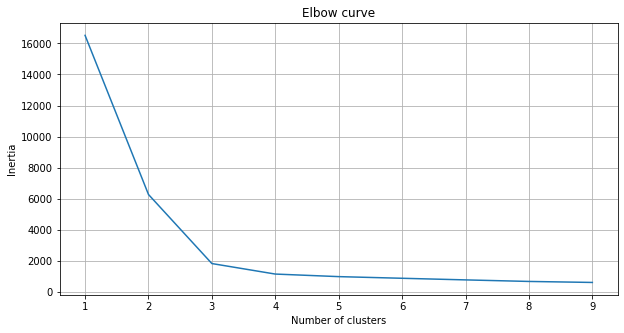

In [18]:
distorsions = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(10, 5))
plt.plot(range(1, 10), distorsions)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.title('Elbow curve')

In this plot it is pretty clear that for $k>4$ there is not much change in inertia, while before $k=4$ it changes much more drastically. Thus, indeed we have "an elbow" when the number of clusters is 4 as expected.

### Q3:

Look at the plot below representing an elbow method for a toy dataset `test_elbow_method.csv`. What number of clusters you should choose in this case?

Text(0.5, 1.0, 'Elbow curve')

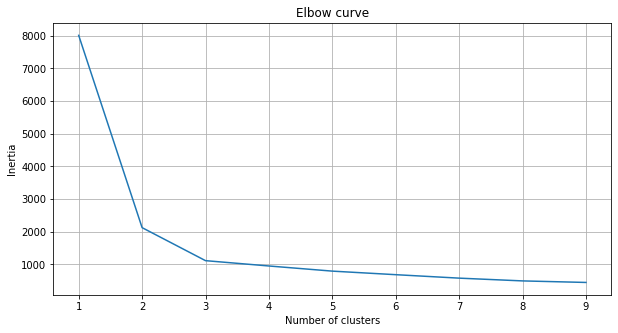

In [19]:
X_test_elbow = pd.read_csv('/home/jovyan/Data/test_elbow_method.csv').values

distorsions = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_test_elbow)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(10, 5))
plt.plot(range(1, 10), distorsions)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.title('Elbow curve')

Use `number_of_clusters = `.

In [20]:
# (1 line of code)
### START ANSWER HERE ###
number_of_clusters = 3
### END ANSWER HERE ###

In [21]:
import hashlib
_myhash = lambda x: hashlib.md5(str(x).encode()).hexdigest()
if _myhash(number_of_clusters) == 'eccbc87e4b5ce2fe28308fd9f2a7baf3':
    print('Correct!')
else:
    print('Not correct! Please try again!')

Correct!


In [ ]:
# nbgrader cell


# Good job!